In [79]:
%matplotlib inline
%load_ext watermark
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import nltk
nltk.download('punkt')
from nltk import word_tokenize
import sys
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from textblob import TextBlob

%watermark -a 'Hanif' -d -t -v -p numpy,pandas,matplotlib,nltk,sklearn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Hanif

Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.29.0

numpy     : 1.19.5
pandas    : 1.3.4
matplotlib: 3.5.0
nltk      : 3.4.5
sklearn   : 0.0



[nltk_data] Downloading package punkt to C:\Users\Hanif Kamil.DESKTOP-
[nltk_data]     PIS7G8D\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
data  = 'E:/dataset/REVIEW GOOGLE'
os.chdir(data)
ls_data = os.listdir(data)
df = pd.read_csv(ls_data[-1])
ls = []
for i in ls_data[:12]:    
    df_temp = pd.read_csv(i, encoding = 'utf-16', delimiter = ',')
    ls.append(df_temp)
appended_data = pd.concat(ls)
df_all = appended_data.append(df)
df_all

,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,...,Developer Reply Date and Time,Developer Reply Millis Since Epoch,Developer Reply Text,Review Link,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,com.pos.bisaaiacademy,NaN,NaN,en,j7velte,2020-07-16T18:57:53Z,1.594926e+12,2020-07-16T18:57:53Z,1.594926e+12,5,...,2020-09-07T06:20:20Z,1599459620911.0,"Hai Premier Optima Sattiga, Terima kasih atas ...",http://play.google.com/console/developers/5503...,NaN,NaN,NaN,NaN,NaN,NaN
1,com.pos.bisaaiacademy,NaN,NaN,en,j7velte,2020-07-16T18:58:38Z,1.594926e+12,2020-07-16T18:58:38Z,1.594926e+12,5,...,2020-09-07T06:19:49Z,1599459589263.0,"Hai Octaviano, Terima kasih atas ulasannya. Te...",http://play.google.com/console/developers/5503...,NaN,NaN,NaN,NaN,NaN,NaN
2,com.pos.bisaaiacademy,10.0,1.0.0.1,id,beryllium,2020-07-17T01:58:36Z,1.594951e+12,2020-07-17T01:58:36Z,1.594951e+12,5,...,2020-09-07T06:19:26Z,1599459566007.0,"Hai Rusnandi Fikri, Terima kasih atas ulasanny...",http://play.google.com/console/developers/5503...,NaN,NaN,NaN,NaN,NaN,NaN
3,com.pos.bisaaiacademy,10.0,1.0.0.1,en,j8y18lte,2020-07-17T02:00:01Z,1.594951e+12,2020-07-17T02:01:03Z,1.594951e+12,5,...,2020-09-07T06:19:02Z,1599459542549.0,"Hai Arya Dandaka, Terima kasih atas ulasannya....",http://play.google.com/console/developers/5503...,NaN,NaN,NaN,NaN,NaN,NaN
4,com.pos.bisaaiacademy,10.0,1.0.0.1,en,ginkgo,2020-07-17T02:17:15Z,1.594952e+12,2020-07-17T02:17:15Z,1.594952e+12,5,...,2020-09-07T06:18:43Z,1599459523096.0,"Hai Thoriq Kautsar, Terima kasih atas ulasanny...",http://play.google.com/console/developers/5503...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,com.pos.bisaaiacademy,65.0,2.0.0.6,id,rosy,2021-08-29T07:03:29Z,1.630220e+12,2021-08-29T07:03:29Z,1.630220e+12,5,...,"dan mempelajari course lainnya tanpa biaya""",NaN,NaN,NaN,http://play.google.com/console/developers/5503...,NaN,NaN,NaN,NaN,NaN
51,com.pos.bisaaiacademy,65.0,2.0.0.6,id,y2s,2021-08-29T11:36:03Z,1.630240e+12,2021-08-29T11:36:03Z,1.630240e+12,5,...,mulai dari silabus yang lengkap,soal evaluasi yang sesuai,tugas akhir yang berkaitan,sampai ada sertifikat di akhir pembelajaran. ...,NaN,NaN,NaN,http://play.google.com/console/developers/5503...,NaN,NaN
52,com.pos.bisaaiacademy,65.0,2.0.0.6,en,lavender,2021-08-29T14:28:43Z,1.630250e+12,2021-08-29T14:28:43Z,1.630250e+12,5,...,aku jadi ketagihan hehe,"top markotop deh pokoknya!""",NaN,NaN,NaN,http://play.google.com/console/developers/5503...,NaN,NaN,NaN,NaN
53,com.pos.bisaaiacademy,65.0,2.0.0.6,id,ASUS_X00T_3,2021-08-30T09:29:10Z,1.630320e+12,2021-08-30T09:29:10Z,1.630320e+12,5,...,NaN,NaN,NaN,http://play.google.com/console/developers/5503...,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data = df_all

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 0 to 54
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Package Name                           326 non-null    object 
 1   App Version Code                       261 non-null    float64
 2   App Version Name                       261 non-null    object 
 3   Reviewer Language                      326 non-null    object 
 4   Device                                 324 non-null    object 
 5   Review Submit Date and Time            326 non-null    object 
 6   Review Submit Millis Since Epoch       326 non-null    float64
 7   Review Last Update Date and Time       326 non-null    object 
 8   Review Last Update Millis Since Epoch  326 non-null    float64
 9   Star Rating                            326 non-null    int64  
 10  Review Title                           0 non-null      float64
 11  Review 

In [6]:
data = data[['Review Text','Star Rating']]
data.isnull().sum()
data = data.dropna()
data

,Review Text,Star Rating
0,Great apps. We can learn AI Online now,5
1,Sangat bermanfaat. Bisa belajar online sekaran...,5
2,Aplikasinya bagus dan sangat membantu pembelaj...,5
3,Great app! Has a very friendly user interface ...,5
4,sangat bagus untuk para pemula dan yang mau la...,5
...,...,...
50,"""Bisa mendalami AI",5
51,"""Aplikasinya sangat berguna dan bermanfaat . B...",5
52,"""Nyaman banget aplikasinya",5
53,Semoga bermanfaat,5


In [7]:
pd.value_counts(data['Star Rating'])

5    232
4     11
2      7
1      5
3      5
Name: Star Rating, dtype: int64

In [8]:
data = data.rename(columns={'Review Text': 'Text', 'Star Rating': 'Rating'})

In [9]:
list_text = list(data.Text)
list_text

['Great apps. We can learn AI Online now',
 'Sangat bermanfaat. Bisa belajar online sekarang terutama materi AI',
 'Aplikasinya bagus dan sangat membantu pembelajaran saya',
 'Great app! Has a very friendly user interface and very easy to use.',
 'sangat bagus untuk para pemula dan yang mau lanjut ke tahap lebih expert aplikasi mudah digunakan',
 'Sangat Membantu sekali dalam pembelajaran mengenai teknologi zaman kini, lanjutkan !!',
 'Sangat mudah dipahami, aplikasi juga user friendly. good job',
 'Mantul',
 'Aplikasi bermanfaat untuk media pembelajaran era baru😊',
 'Huhuu akhirnya ada platform buat belajar AI',
 'Menjadi pilihan belajar terbaik...',
 'Aplikasi yang saya butuhkan Mantap!!!',
 'Mantab',
 'Aplikasinya membantu untuk belajar, apalagi coursenya gk melulu bayar, bisa register yang free course. Semoga tambah bagus aplikasi kedepannya',
 'Great apps',
 'Aplikasi ini sangat menarik. Benar-benar memudahkan saya dalam belajar programming. Kalian jangan lupa untuk ikut download 

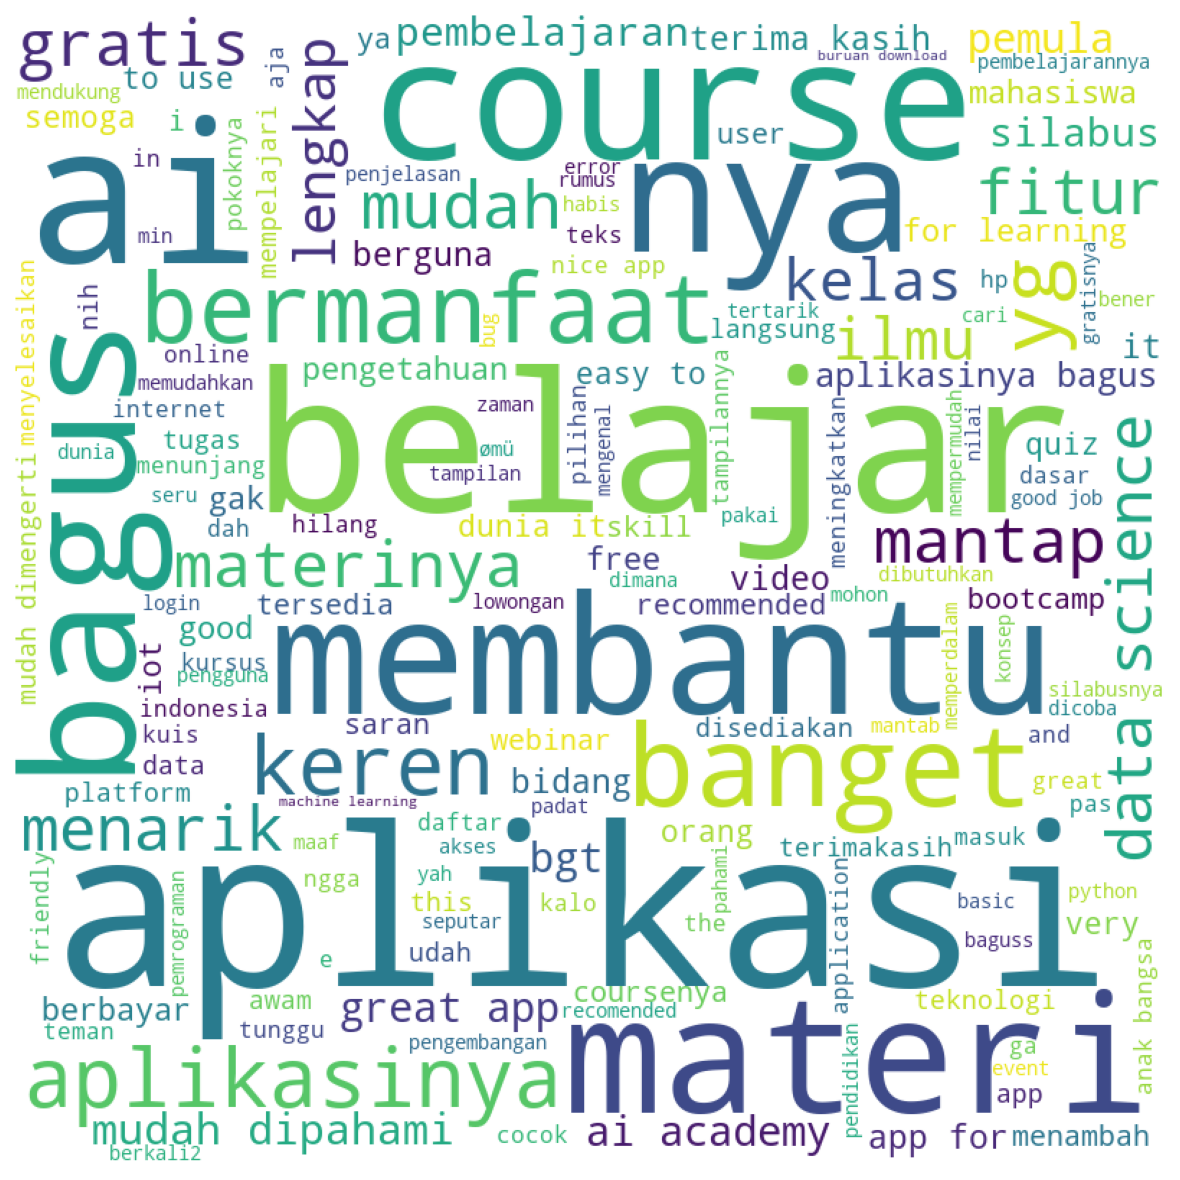

In [10]:
comment_words = ''
stops = set(stopwords.words('indonesian')) #NLTK
 
# iterate through the csv file
for val in data.Text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stops,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [11]:
data['sentiment'] = data['Rating']
data['sentiment'].replace({5: "Positif", 4: "Positif", 3: "Netral", 2:"Negatif", 1:"Negatif"}, inplace=True)

In [67]:
reviews = [x for x in data.Text]
new_reviews = []
for x in reviews:
    pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    pattern1 = re.compile(r'pic.twitter.com/(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    x = re.sub(pattern1,' ',x)#Convert to lower case
    x = x.lower()#Convert www.* or https?://*
    x = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',x)#remove symbols
    x = re.sub(r'[^.,a-zA-Z0-9 \n\.]',' ',x)
    x = x.replace(',',' ').replace('.',' ')#Convert @username to AT_USER
    x = re.sub('@+','',x)#Remove additional white spaces
    x = re.sub('[\s]+', ' ', x)#Replace #word with word
    x = re.sub(r'#([^\s]+)', r'\1', x)#trim
    x = x.strip('\'"')
    x = ' '.join(re.sub(pattern,' ',x).split()) #remove urls if any
    new_reviews.append(str(x))
    analysis = TextBlob(x)
    print(analysis.sentiment.polarity)

0.8
0.0
0.0
0.6169444444444445
0.0
0.0
0.5375
0.0
0.0
0.0
0.0
0.0
0.0
0.4
0.8
0.0
0.0
0.0
0.0
0.0
0.7
0.7
0.0
0.0
0.0
0.8
0.0
0.6
0.0
0.0
0.0
0.012121212121212125
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.7
0.0
0.0
0.0
0.0
0.0
0.7
0.4
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.7
0.0
0.0
0.0
0.0
0.0
0.2
0.0
0.3
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.2
0.0
0.0
0.0
0.0
0.0
0.4
0.0
0.0
0.0
0.0
0.0
0.0
0.375
0.0
0.0
0.0
0.0
0.7
0.0
0.5166666666666666
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.13333333333333333
0.0
0.4
0.0
0.0
0.4
0.0
0.0
0.0
0.0
0.45
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.8
0.1
0.0
-0.1
0.0
0.0
1.0
0.0
0.7
0.0
0.8
0.6166666666666667
0.6000000000000001
0.0
0.4
0.0
0.7
-0.13333333333333333
0.0
0.0
0.8
0.0
0.8
0.0
0.0
0.0
0.0
0.0
0.0
0.15
0.0
0.0
0.8
0.0
0.0
0.0
0.0
0.0
0.2
0.0
0.0
0.0
1.0
0.0
0.6
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.325
0.0
0.0
0.0
0.5166666666666666
0.0
0.0
0.0
0.5633333333333334
0.0
0.43333333333333335
0.0
0.0
0.0
0.0
0

In [62]:
clean = list(new_reviews)
clean

['great apps we can learn ai online now',
 'sangat bermanfaat bisa belajar online sekarang terutama materi ai',
 'aplikasinya bagus dan sangat membantu pembelajaran saya',
 'great app has a very friendly user interface and very easy to use',
 'sangat bagus untuk para pemula dan yang mau lanjut ke tahap lebih expert aplikasi mudah digunakan',
 'sangat membantu sekali dalam pembelajaran mengenai teknologi zaman kini lanjutkan',
 'sangat mudah dipahami aplikasi juga user friendly good job',
 'mantul',
 'aplikasi bermanfaat untuk media pembelajaran era baru',
 'huhuu akhirnya ada platform buat belajar ai',
 'menjadi pilihan belajar terbaik',
 'aplikasi yang saya butuhkan mantap',
 'mantab',
 'aplikasinya membantu untuk belajar apalagi coursenya gk melulu bayar bisa register yang free course semoga tambah bagus aplikasi kedepannya',
 'great apps',
 'aplikasi ini sangat menarik benar benar memudahkan saya dalam belajar programming kalian jangan lupa untuk ikut download yah',
 'aplikasi ini s

In [63]:
stopword = StopWordRemoverFactory().create_stop_word_remover()
stemmer = StemmerFactory().create_stemmer()
clean_reviews = []
for i,kalimat in enumerate(clean):
    stop = stopword.remove(kalimat)
    stem = stemmer.stem(stop)
    print('sentence:',i+1,'from',len(clean))
    clean_reviews.append(stem)

sentence: 1 from 260
sentence: 2 from 260
sentence: 3 from 260
sentence: 4 from 260
sentence: 5 from 260
sentence: 6 from 260
sentence: 7 from 260
sentence: 8 from 260
sentence: 9 from 260
sentence: 10 from 260
sentence: 11 from 260
sentence: 12 from 260
sentence: 13 from 260
sentence: 14 from 260
sentence: 15 from 260
sentence: 16 from 260
sentence: 17 from 260
sentence: 18 from 260
sentence: 19 from 260
sentence: 20 from 260
sentence: 21 from 260
sentence: 22 from 260
sentence: 23 from 260
sentence: 24 from 260
sentence: 25 from 260
sentence: 26 from 260
sentence: 27 from 260
sentence: 28 from 260
sentence: 29 from 260
sentence: 30 from 260
sentence: 31 from 260
sentence: 32 from 260
sentence: 33 from 260
sentence: 34 from 260
sentence: 35 from 260
sentence: 36 from 260
sentence: 37 from 260
sentence: 38 from 260
sentence: 39 from 260
sentence: 40 from 260
sentence: 41 from 260
sentence: 42 from 260
sentence: 43 from 260
sentence: 44 from 260
sentence: 45 from 260
sentence: 46 from 2

In [68]:
data['Clean_Text'] = clean_reviews
data

,Text,Rating,sentiment,Clean_Text,polarity
0,Great apps. We can learn AI Online now,5,Positif,great apps we can learn ai online now,0.0
1,Sangat bermanfaat. Bisa belajar online sekaran...,5,Positif,sangat manfaat ajar online sekarang utama mate...,0.0
2,Aplikasinya bagus dan sangat membantu pembelaj...,5,Positif,aplikasi bagus sangat bantu ajar,0.0
3,Great app! Has a very friendly user interface ...,5,Positif,great app has a very friendly user interface a...,0.0
4,sangat bagus untuk para pemula dan yang mau la...,5,Positif,sangat bagus para mula yang mau lanjut tahap l...,0.0
...,...,...,...,...,...
50,"""Bisa mendalami AI",5,Positif,dalam ai,0.0
51,"""Aplikasinya sangat berguna dan bermanfaat . B...",5,Positif,aplikasi sangat guna manfaat bagai fitur sedia...,0.0
52,"""Nyaman banget aplikasinya",5,Positif,nyaman banget aplikasi,0.0
53,Semoga bermanfaat,5,Positif,moga manfaat,0.0


In [69]:
order = data.sentiment.value_counts(ascending=True).index
order

Index(['Netral', 'Negatif', 'Positif'], dtype='object')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

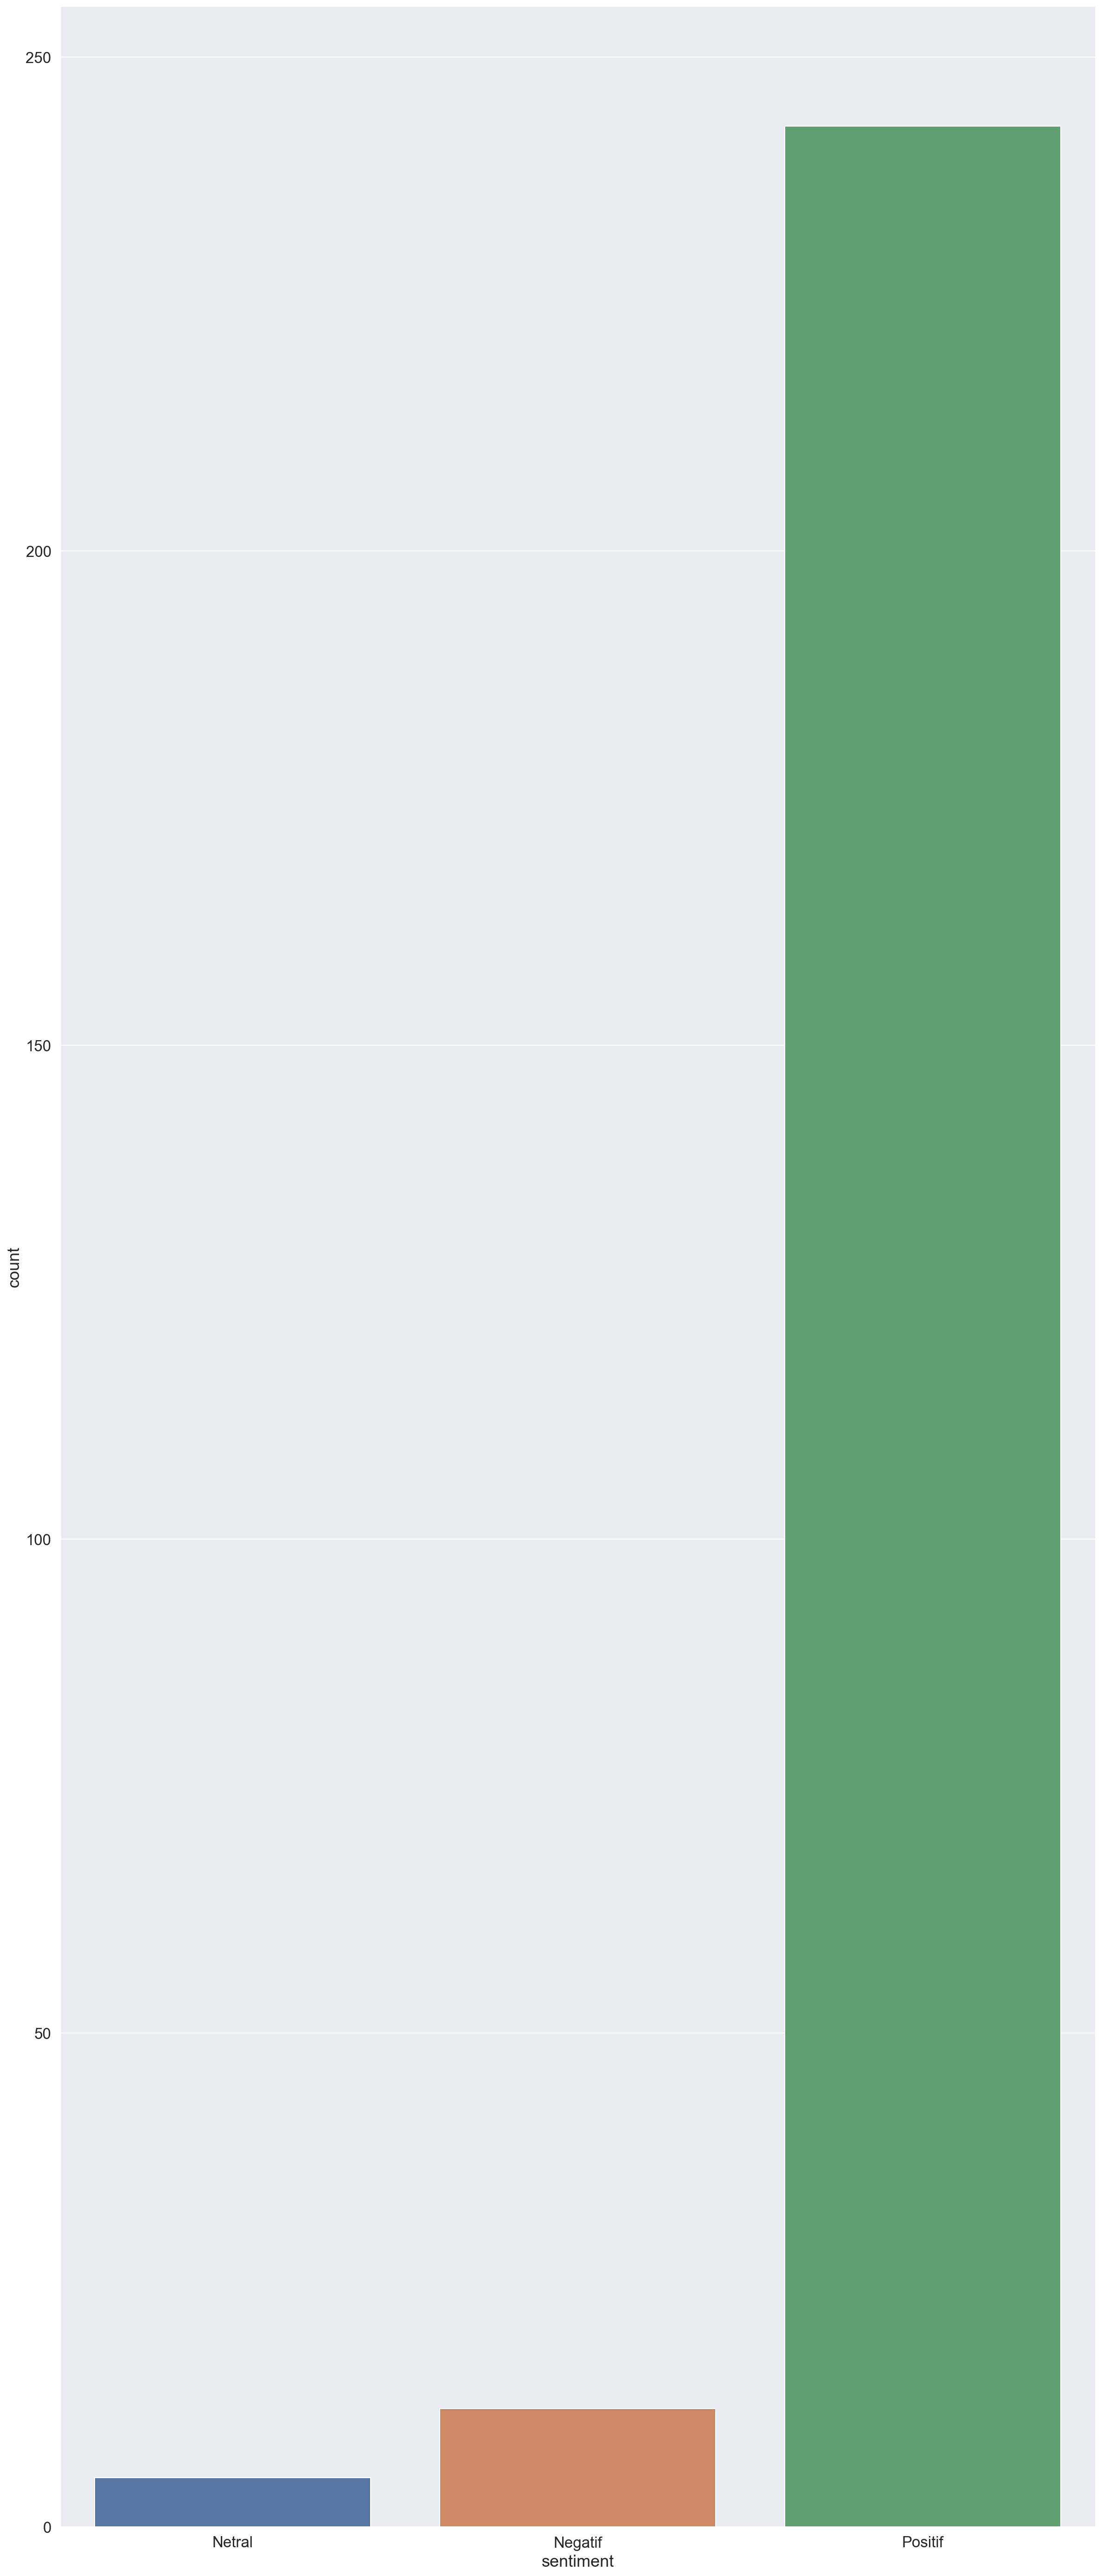

In [70]:
plt.figure(figsize=(20,50))
sns.countplot(x='sentiment', data=data, orient='h', order=order)

C:\miniconda3\lib\site-packages\seaborn\categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


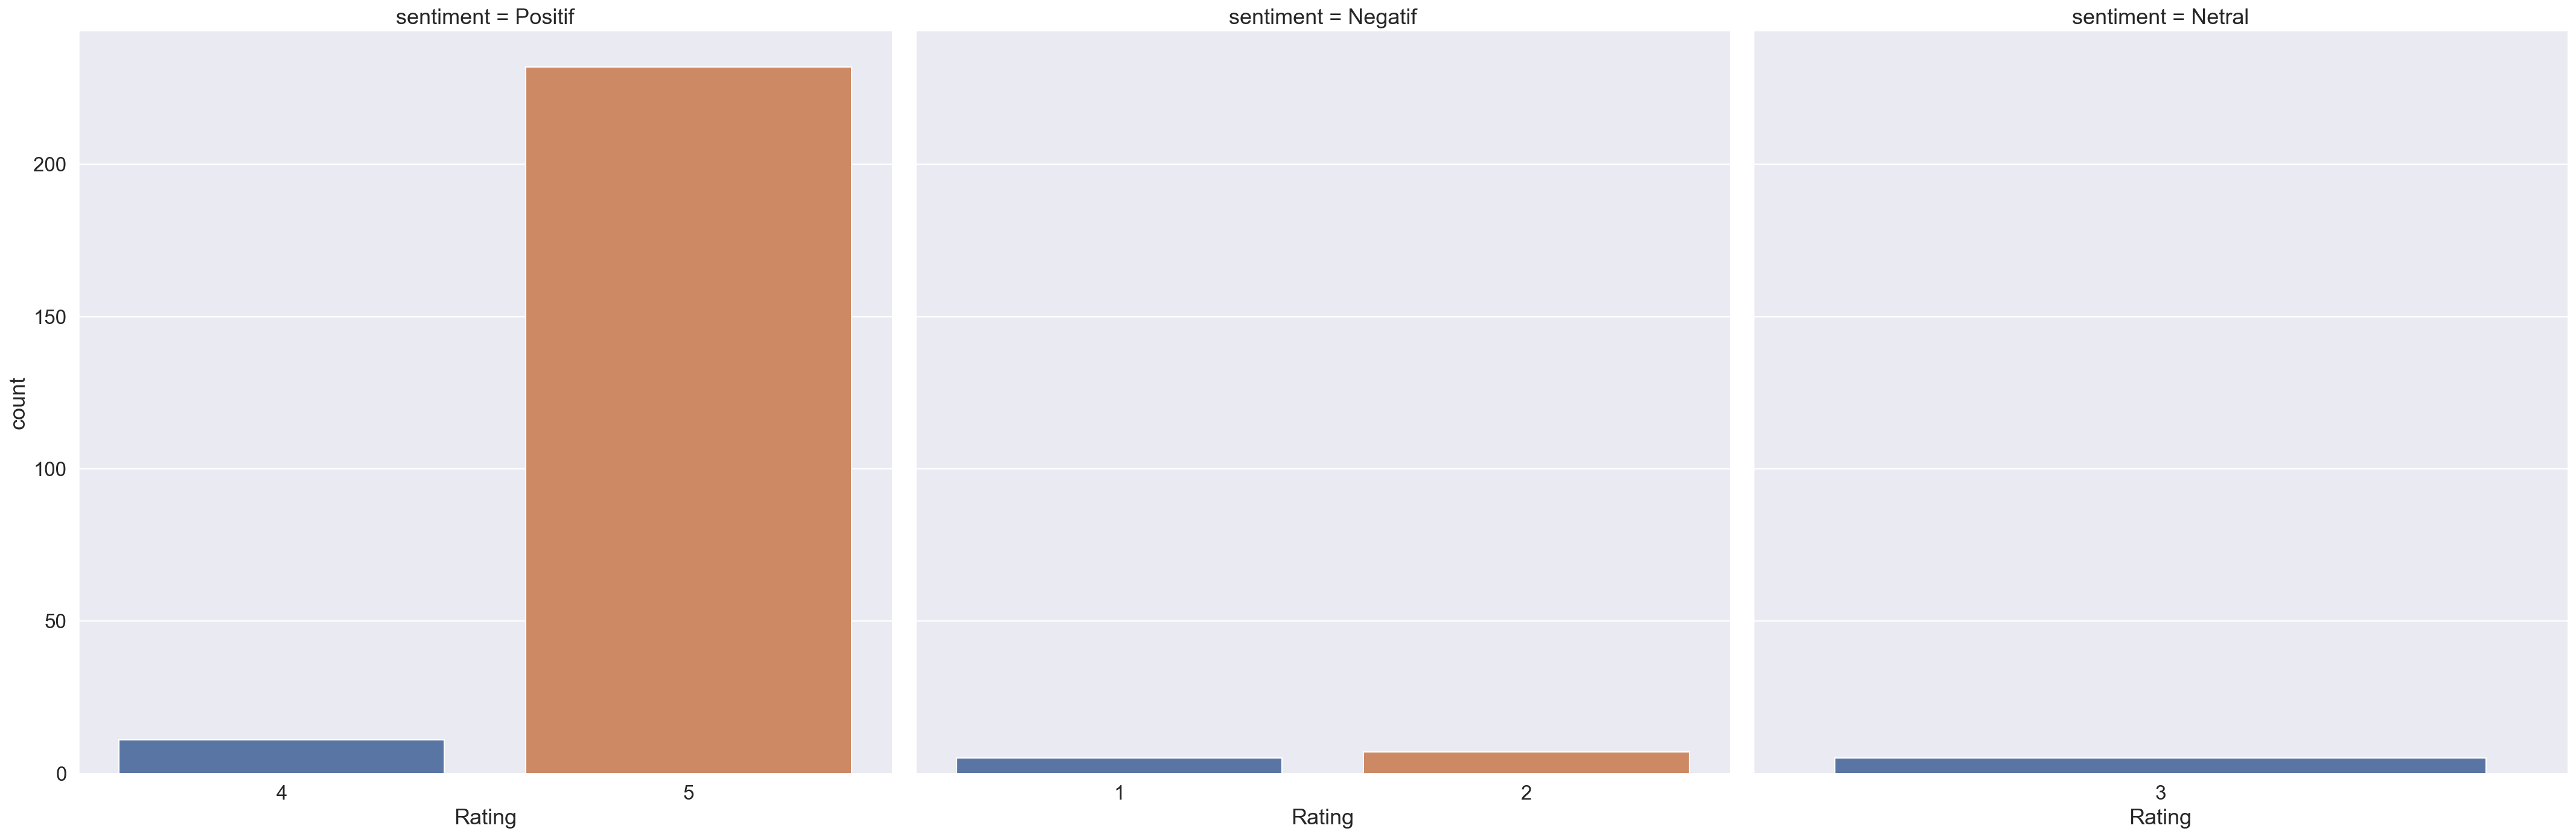

In [71]:
sns.set(font_scale=1.5)
sns.catplot(data=data, x='Rating', col='sentiment', col_wrap=3, sharex=False, height=10, kind='count');

In [72]:
data.to_csv('E:/dataset/Sentiment Result.csv')
data.to_html('E:/dataset/Sentiment Result.html')

In [73]:
X = data['Clean_Text']
y = data['sentiment']
cv = CountVectorizer()
cou_vec = cv.fit_transform(X)
tfidf = TfidfTransformer()
corps = tfidf.fit_transform(cou_vec)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(corps,y, test_size=0.33, random_state=42)

In [123]:
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=1)
decision_tree = decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

In [124]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9302325581395349
[[ 0  0  3]
 [ 0  0  0]
 [ 2  1 80]]


In [125]:
modeltree = DecisionTreeClassifier(criterion='entropy')
modeltree.fit(X_train, y_train)
predictions_tree = modeltree.predict(X_test)

In [126]:
print ("\nHere is the classification report:") 
print (classification_report(y_test, predictions_tree))


Here is the classification report:
              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         3
     Positif       0.97      1.00      0.98        83

    accuracy                           0.97        86
   macro avg       0.48      0.50      0.49        86
weighted avg       0.93      0.97      0.95        86



C:\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
Xtrain, Xtest, ytrain, ytest = train_test_split(corps,y, test_size=0.33, random_state=42)

In [128]:
modelsvm = SVC(kernel='linear')
modelsvm = modelsvm.fit(Xtrain, ytrain)
ypred = modelsvm.predict(Xtest)

In [129]:
print(accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))

0.9651162790697675
[[ 0  3]
 [ 0 83]]


In [132]:
svm = DecisionTreeClassifier(criterion='entropy')
svm.fit(Xtrain, ytrain)
predictions_SVM = svm.predict(Xtest)

In [133]:
print ("\nHere is the classification report:") 
print (classification_report(ytest, predictions_SVM))


Here is the classification report:
              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         3
     Positif       0.96      0.96      0.96        83

    accuracy                           0.93        86
   macro avg       0.48      0.48      0.48        86
weighted avg       0.93      0.93      0.93        86

